# Week 4: Setting up ML problem - Polynomial regression

## Acknowledgements and credits
This notebook in large part is a reproduction of Jupyter notebook exercises bundled with the article *P. Mehta et. al., Phys. Rep. 810 (2019) 1-124*. All credit goes to the authors P. Mehta et. al.

## Overview 

Our task is going to be a simple one, fitting data with polynomials of different order. Formally, this goes under the name of polynomial regression. Here we will do a series of exercises that are intended to give the reader intuition about the major challenges that any machine learning algorithm faces.

## Learning Goal

We will explore how our ability to predict depends on the number of data points we have, the "noise" in the data, and our knowledge about relevant features. The goal is to build intuition about why prediction is difficult and discuss general strategies for overcoming these difficulties.


## The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation
$$
    y_i= f(x_i) + \eta_i,
$$
where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that
$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$
We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make prediction, we will consider a family of functions $g_\alpha(x;\theta_\alpha)$ that depend on some parameters $\theta_\alpha$. These functions respresent the **model class** that we are using to try to model the data and make predictions. The $g_\alpha(x;\theta_\alpha)$ encode the class of **features** we are using to represent the data.

To learn the parameters $\boldsymbol{\theta}$, we will train our models on a **training data set** and then test the effectiveness of the model on a <i>different</i> dataset, the **test data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen. As we will see below, models that give the best fit to the training data do not necessarily make the best predictions on the test data. This will be a running theme that we will encounter repeatedly in machine learning.  


For the remainder of the notebook, we will focus on polynomial regression. Our task is to model the data with polynomials and make predictions about the new data that we have not seen.
We will consider two qualitatively distinct situations: 
<ul>
<li> In the first case, the process that generates the underlying data is in the model class we are using to make predictions. For polynomial regression, this means that the functions $f(x_i)$ are themselves polynomials.
<li>In the second case, our data lies outside our model class. In the case of polynomial regression, this could correspond to the case where the $f(x_i)$ is a 10-th order polynomial but $g_\alpha(x;\theta_\alpha)$ are polynomials of order 1 or 3.
</ul>

In the exercises and discussion we consider 3 model classes:
<ul>
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 1 (linear models),
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 3,
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 10.
</ul>

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$
We will try to get a qualitative picture by examining plots on test and training data.

# Training the models:

In [ ]:
#This is Python Notebook to walk through polynomial regression examples
#We will use this to think about regression
import numpy as np
from scipy import stats
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt, rcParams
fig = plt.figure(figsize=(8, 6))

# The Training Data
N_train=100
sigma_train=1;

# Train on integers
x=np.linspace(0.05,0.95,N_train)
# Draw Gaussian random noise
s = sigma_train*np.random.randn(N_train)

#linear
#y=2*x+s

# Tenth Order
y=2*x-10*x**5+15*x**10+s

slope, intercept, r, p, std_err = stats.linregress(x, y)

def lin_scipy(z):
    return slope * z + intercept

try:
    xplot
except NameError:
    import numpy as np
    xplot = np.linspace(min(x) - 0.03, max(x) + 0.03, 400)

yplot_scipy = lin_scipy(xplot)

print("SciPy linregress on training data")
print(f"  slope     = {slope:.6f}")
print(f"  intercept = {intercept:.6f}")
print(f"  r         = {r:.6f}  (R^2 = {r**2:.6f})")

plt.plot(xplot, yplot_scipy, label="SciPy Linear (linregress)")

# Polynomial Regression
poly3 = PolynomialFeatures(degree=3)
# Construct polynomial features
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)


Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

# Fifth order polynomial in case you want to try it out
#poly5 = PolynomialFeatures(degree=5)
#X = poly5.fit_transform(x[:,np.newaxis])
#clf5 = linear_model.LinearRegression()
#clf5.fit(X,y)

#Xplot=poly5.fit_transform(xplot[:,np.newaxis])
#plt.plot(xplot, clf5.predict(Xplot), 'r--',linewidth=1)

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")

# Linear Filename
filename_train="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Tenth Order Filename
#filename_train="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Saving figure and showing results
plt.savefig(filename_train)
plt.grid()
plt.show()

# Testing the fitted models

In [ ]:
# Generate Test Data
%matplotlib inline
# Number of test data
N_test=20
sigma_test=sigma_train

# Generate random grid points (x) in the interval [0, max_x]:
# Note some points will be drawn outside the training interval
max_x=1.2
x_test=max_x*np.random.random(N_test)

# Draw random Gaussian noise
s_test = sigma_test*np.random.randn(N_test)

# Linear
y_test=2*x_test+s_test
# Tenth order
#y_test=2*x_test-10*x_test**5+15*x_test**10+s_test


In [ ]:
# Make design matrices for prediction
x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

############## PLOTTING RESULTS ##########

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))

# Linear Filename
filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

# Tenth Order Filename
#filename_test=Title+"pred-o10.pdf"

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()

# Exercises
PS: Please write all new codes below this cell. Each exercise should be in a new cell and should be marked clearly as markdown text. Each part of the exercise should be marked in comments.


## Exercise 1: Fitting vs. predicting when the data is in the model class


We start by considering the case:
$$
f(x)=2x.
$$
Then the data is clearly generated by a model that is contained within all three model classes we are using to make predictions (linear models, third order polynomials, and tenth order polynomials). 


Run the code for the following cases:
<ul> 
<li> For $f(x)=2x$, $N_{\mathrm{train}}=10$ and $\sigma=0$ (noiseless case), train the three classes of models (linear, third-order polynomial, and tenth order polynomial) for a training set when $x_i  \in [0,1]$. Make graphs comparing fits for different order of polynomials. Which model fits the data the best?
<li> Do you think that the data that has the least error on the training set will also make the best predictions? Why or why not? Can you try to discuss and formalize your intuition? What can go right and what can go wrong?
<li>Check your answer by seeing how well your fits predict newly generated test data (including on data outside the range you fit on, for example $x \in [0,1.2]$) using the code below. How well do you do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
<li>Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=10$, and $\sigma=1$. What changes?
<li>Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=1000$, and $\sigma=1$. What changes?
<li>Repeat the exercises above for $\sigma=0.1$ without changing any other parameters or functions. What changes?
<li> Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.
</ul>


## Exercise 2: Fitting vs. predicting when the data is not in the model class
Thus far, we have considered the case where the data is generated using a model contained in the model class. Now consider  $f(x)=2x-10x^5+15x^{10}$. *Notice that the for linear and third-order polynomial the true model $f(x)$ is not contained in model class $g_\alpha(x)$* .

<ul>
<li> Repeat the exercises above fitting and predicting for $f(x)=2x-10x^5+15x^{10}$ for $N_{\mathrm{train}}=10,1000$ and $\sigma=0,1$. Record your observations.
<li> Do better fits lead to better predictions?
<li> What is the relationship between the true model for generating the data and the model class that has the most predictive power? How is this related to the model complexity? How does this depend on the number of data points $N_{\mathrm{train}}$ and $\sigma$?
<li> Summarize what you think you learned about the relationship of knowing the true model class and predictive power.
</ul>


## Exercise 3: Compute the cost function
Note the formula for cost function in the paragraph above. $y_j$ is the actual value in test dataset, $N_{test}$ is the size of test dataset, and $y_{pred}$ is the y value predicted by a given model. 
<ul>
    <li> Using the formula for cost function defined above, find the cost function for linear regression model (degree 1). 
    <li> Repeat the same for polynomial regression model of degree 3. 
</ul>


## Exercise 4: Build a polynomial regression model from scratch
<ul>
    <li> Transform the original dataset x into X_new with 2 new features corresponding to $x^2$ and $x^3$. 
    <li> Define the model $f(x,\theta)$ and cost function C.
    <li> Use any available algorithm to iteratively tune $\theta_0,\theta_1,\theta_2,\theta_3$ so that the cost function is minimized (minimum five iterations). 
    <li> Display the final model by substituting the values of $\theta$. 
</ul>

# Answers

## Exercise 1

In [ ]:
#Part 1: ... 
import numpy as np
from matplotlib import pyplot as plt ,rcParams
from scipy import stats
import warnings
warnings.simplefilter('ignore', np.RankWarning)

fig=plt.figure(figsize=(8,6))

#traning the model under particular dataset
N_train=1000
#traning over 0 noise 
sigma_train=1

x=np.linspace(0,1,N_train)
s=sigma_train*np.random.randn(N_train)
#defining the function f(x)
y=2*x+s
slope,intercept,r,p,std_err=stats.linregress(x,y)
def line_reg(z):
    return slope*z+intercept

try:
    xplot

except NameError:
    xplot=np.linspace(min(x)-0.03,max(x)+0.03,400)

yplot=line_reg(xplot)
p3 = np.poly1d(np.polyfit(x, y, 3)) 
p10 = np.poly1d(np.polyfit(x, y, 10)) 

plt.scatter(x, y)
plt.plot(xplot, yplot, label="SciPy Linear (linregress)")
plt.plot(xplot, p3(xplot),  label='Poly deg 3')
plt.plot(xplot, p10(xplot), label='Poly deg 10')
plt.legend(loc='best')
plt.xlim(0, 1); plt.ylim(-0.1, 2.1)
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")
plt.grid()
plt.show()

#comparing fits for different models
mse = lambda yt, yp: np.mean((yt - yp)**2)
print("Train MSE:")
print("  Linear  :", mse(y, line_reg(x)))
print("  Poly 3  :", mse(y, p3(x)))
print("  Poly 10 :", mse(y, p10(x)))
print(f"(linregress) slope={slope:.6f}, intercept={intercept:.6f}, R^2={r**2:.6f}, p={p:.3e}, SE={std_err:.6f}")

**The best fit training dataset cannot be the best predictor because over training dataset the highest order ploynomial fits properly and drives to nearly ~0 MSE whereas going to the test dataset it varies a lot.Something which can go on the right side is that we are having the linear function so linear model will perform best in this case with the less noise , also thing which can go wrong is the ill-conditioning of the higher order with the MSE because of the small N and less noise .**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)                    
N_test    = 10
sigma_test = sigma_train             
max_x     = 1.2

# Generate test data from the same ground truth: f(x)=2x + noise
x_test = max_x * np.random.rand(N_test)
y_test = 2.0 * x_test + sigma_test * np.random.randn(N_test)

# Prediction grid (extend beyond training range to 1.2)
x_plot      = np.linspace(0.0, max_x, 200)
y_lin_plot  = line_reg(x_plot)       
y_p3_plot   = p3(x_plot)             
y_p10_plot  = p10(x_plot)            

# Plot fits vs. test points
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, s=50, alpha=0.6, label="test data")
plt.plot(x_plot, y_lin_plot,  lw=2, label="linear (SciPy)")
plt.plot(x_plot, y_p3_plot,   lw=2, label="3rd order")
plt.plot(x_plot, y_p10_plot,  lw=2, label="10th order")
plt.xlabel("x"); plt.ylabel("y")
plt.title(f"N_test={N_test}, σ={sigma_test:.2f} (pred.)")
plt.grid(True); plt.legend(loc="best")
plt.tight_layout()
plt.ylim((-6, 12))                    # adjust as you like
plt.savefig(f"pred-linear_N={N_test}_noise={sigma_test:.2f}.pdf")
plt.show()

# --- Test MSEs (overall, in-range, and outside-range) ---
mse = lambda yt, yp: float(np.mean((yt - yp)**2))
mask_in  = x_test <= 1.0
mask_out = x_test > 1.0

print("Test MSE (overall 0..1.2):")
print("  Linear :", mse(y_test, line_reg(x_test)))
print("  Poly 3 :", mse(y_test, p3(x_test)))
print("  Poly10 :", mse(y_test, p10(x_test)))

print("\nTest MSE (in-range 0..1):")
print("  Linear :", mse(y_test[mask_in],  line_reg(x_test[mask_in])))
print("  Poly 3 :", mse(y_test[mask_in],  p3(x_test[mask_in])))
print("  Poly10 :", mse(y_test[mask_in],  p10(x_test[mask_in])))

print("\nTest MSE (outside 1..1.2]:")
print("  Linear :", mse(y_test[mask_out], line_reg(x_test[mask_out])))
print("  Poly 3 :", mse(y_test[mask_out], p3(x_test[mask_out])))
print("  Poly10 :", mse(y_test[mask_out], p10(x_test[mask_out])))


In [ ]:
#Part 1: ... 
import numpy as np
from matplotlib import pyplot as plt ,rcParams
from scipy import stats
import warnings
warnings.simplefilter('ignore', np.RankWarning)

fig=plt.figure(figsize=(8,6))

#traning the model under particular dataset
N_train=10
#traning over 0 noise 
sigma_train=0

x=np.linspace(0,1,N_train)
s=sigma_train*np.random.randn(N_train)
#defining the function f(x)
y=2*x-10*x**5+15*x**10+s
slope,intercept,r,p,std_err=stats.linregress(x,y)
def line_reg(z):
    return slope*z+intercept

try:
    xplot

except NameError:
    xplot=np.linspace(min(x)-0.03,max(x)+0.03,400)

yplot=line_reg(xplot)
p3 = np.poly1d(np.polyfit(x, y, 3)) 
p10 = np.poly1d(np.polyfit(x, y, 10)) 

plt.scatter(x, y)
plt.plot(xplot, yplot, label="SciPy Linear (linregress)")
plt.plot(xplot, p3(xplot),  label='Poly deg 3')
plt.plot(xplot, p10(xplot), label='Poly deg 10')
plt.legend(loc='best')
plt.xlim(0, 1.2)
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")
plt.grid()
plt.show()

#comparing fits for different models
mse = lambda yt, yp: np.mean((yt - yp)**2)
print("Train MSE:")
print("  Linear  :", mse(y, line_reg(x)))
print("  Poly 3  :", mse(y, p3(x)))
print("  Poly 10 :", mse(y, p10(x)))
print(f"(linregress) slope={slope:.6f}, intercept={intercept:.6f}, R^2={r**2:.6f}, p={p:.3e}, SE={std_err:.6f}")

In [ ]:
#Part 1: ... 
import numpy as np
from matplotlib import pyplot as plt ,rcParams
from scipy import stats
import warnings
warnings.simplefilter('ignore', np.RankWarning)

fig=plt.figure(figsize=(8,6))

#traning the model under particular dataset
N_train=10
#traning over 0 noise 
sigma_train=1

x=np.linspace(0,1,N_train)
s=sigma_train*np.random.randn(N_train)
#defining the function f(x)
y=2*x-10*x**5+15*x**10+s
slope,intercept,r,p,std_err=stats.linregress(x,y)
def line_reg(z):
    return slope*z+intercept

try:
    xplot

except NameError:
    xplot=np.linspace(min(x)-0.03,max(x)+0.03,400)

yplot=line_reg(xplot)
p3 = np.poly1d(np.polyfit(x, y, 3)) 
p10 = np.poly1d(np.polyfit(x, y, 10)) 

plt.scatter(x, y)
plt.plot(xplot, yplot, label="SciPy Linear (linregress)")
plt.plot(xplot, p3(xplot),  label='Poly deg 3')
plt.plot(xplot, p10(xplot), label='Poly deg 10')
plt.legend(loc='best')
plt.xlim(0, 1.2)
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")
plt.grid()
plt.show()

#comparing fits for different models
mse = lambda yt, yp: np.mean((yt - yp)**2)
print("Train MSE:")
print("  Linear  :", mse(y, line_reg(x)))
print("  Poly 3  :", mse(y, p3(x)))
print("  Poly 10 :", mse(y, p10(x)))
print(f"(linregress) slope={slope:.6f}, intercept={intercept:.6f}, R^2={r**2:.6f}, p={p:.3e}, SE={std_err:.6f}")

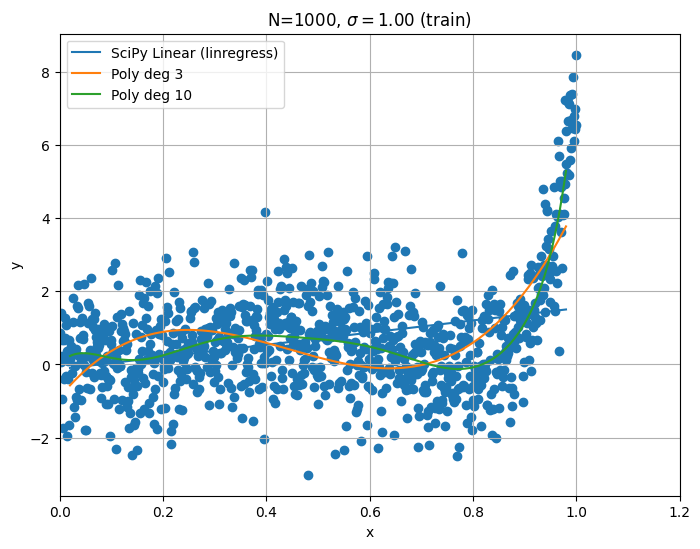

Train MSE:
  Linear  : 2.1352243603866143
  Poly 3  : 1.46763445312126
  Poly 10 : 1.0699750313576772
(linregress) slope=1.664964, intercept=-0.127478, R^2=0.097804, p=3.967e-24, SE=0.160071


In [5]:

#Part 1: ... 
import numpy as np
from matplotlib import pyplot as plt ,rcParams
from scipy import stats
import warnings
warnings.simplefilter('ignore', np.RankWarning)

fig=plt.figure(figsize=(8,6))

#traning the model under particular dataset
N_train=1000
#traning over 0 noise 
sigma_train=1

x=np.linspace(0,1,N_train)
s=sigma_train*np.random.randn(N_train)
#defining the function f(x)
y=2*x-10*x**5+15*x**10+s
slope,intercept,r,p,std_err=stats.linregress(x,y)
def line_reg(z):
    return slope*z+intercept

try:
    xplot

except NameError:
    xplot=np.linspace(min(x)-0.03,max(x)+0.03,400)

yplot=line_reg(xplot)
p3 = np.poly1d(np.polyfit(x, y, 3)) 
p10 = np.poly1d(np.polyfit(x, y, 10)) 

plt.scatter(x, y)
plt.plot(xplot, yplot, label="SciPy Linear (linregress)")
plt.plot(xplot, p3(xplot),  label='Poly deg 3')
plt.plot(xplot, p10(xplot), label='Poly deg 10')
plt.legend(loc='best')
plt.xlim(0, 1.2)
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")
plt.grid()
plt.show()

#comparing fits for different models
mse = lambda yt, yp: np.mean((yt - yp)**2)
print("Train MSE:")
print("  Linear  :", mse(y, line_reg(x)))
print("  Poly 3  :", mse(y, p3(x)))
print("  Poly 10 :", mse(y, p10(x)))
print(f"(linregress) slope={slope:.6f}, intercept={intercept:.6f}, R^2={r**2:.6f}, p={p:.3e}, SE={std_err:.6f}")

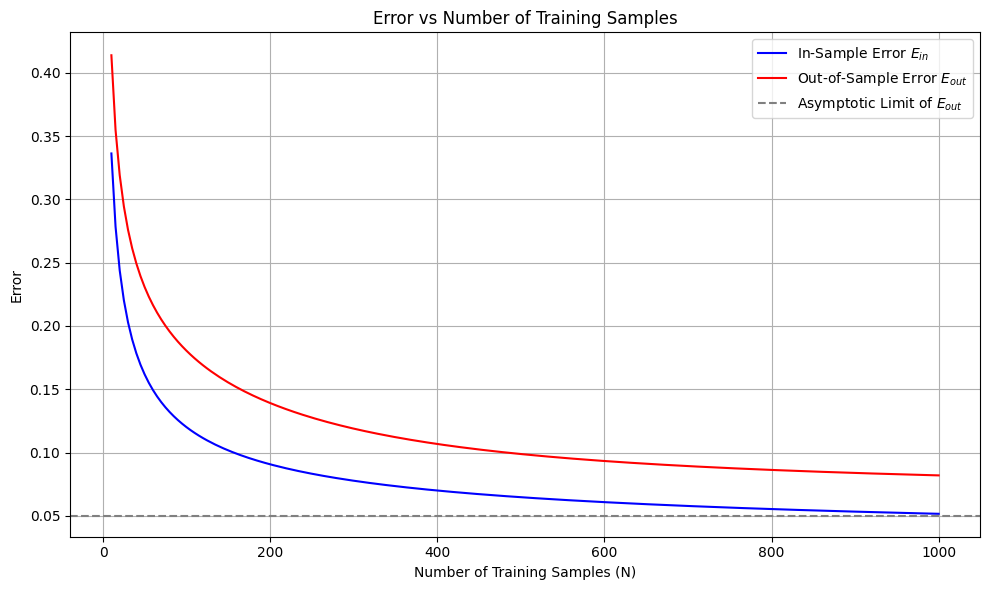